In [ ]:
# Подключаем гугл диск

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# подгружаем файл и считываем с помощью пандас (п.2)

file = ('/content/drive/MyDrive/Dataset/Titanic-Dataset.csv')
titanicData = pd.read_csv(file)
ttc_df = titanicData.copy() # Копия для внесения правок

In [ ]:
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


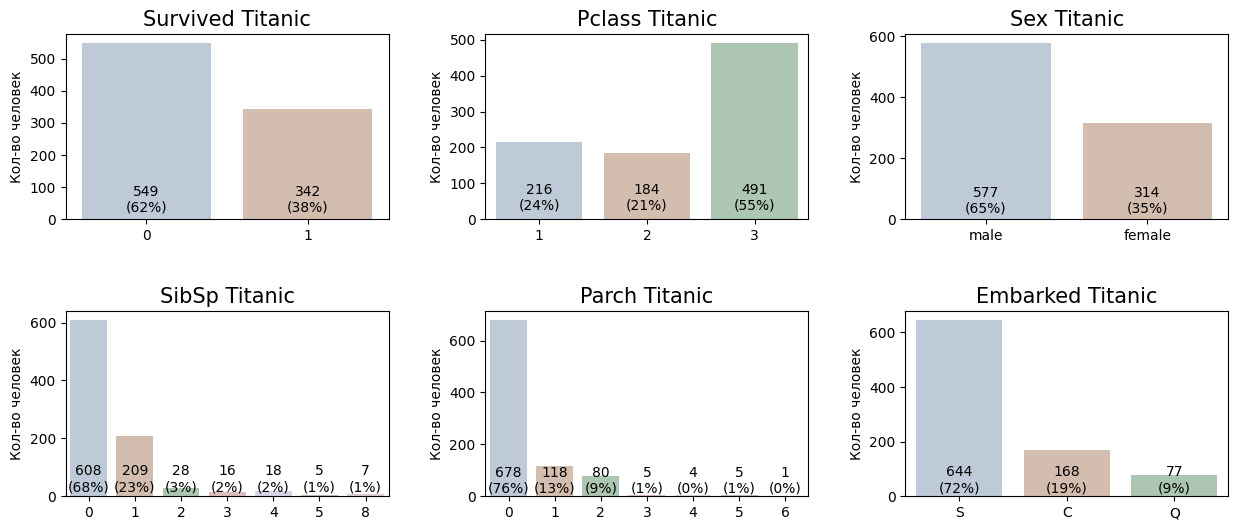

In [ ]:
# Первичный анализ данных (п.7)

fig, myplot = plt.subplots(figsize = (15,6), nrows = 2,ncols = 3)

features = ["Survived","Pclass","Sex","SibSp","Parch","Embarked"]

row, col, num_cols = 0,0,3

for u in features:
    sns.barplot(x = titanicData[u].value_counts().index,y = titanicData[u].value_counts(),
                ax  = myplot[row, col], palette='pastel', saturation=0.3)
    myplot[row, col].set_xlabel("")
    myplot[row, col].set_title(u + " Titanic", fontsize = 15)
    myplot[row, col].set_ylabel("Кол-во человек")
    col = col + 1
    if col == 3:
        col = 0
        row = row + 1

plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.3)
# i put roundbracket around x,y,z to make more sense. just like how x \in [1,2,3]
# and if x is a tuple or bracket
#we have   u \in [(1,2,3),(2,3,5),...] where u = (x,y,z)

#for each patch in each graph from [0,0] to [1,2], we want to do the following...
for v in range(2):
    for z in range(3):
        for patch in myplot[v,z].patches:
            label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
            label_y = 60
            myplot[v,z].text(label_x, label_y,
                             str(int(patch.get_height())) + '\n' + '('+'{:.0%}'.format(
                               patch.get_height()/len(titanicData.Survived))+')',
                            horizontalalignment='center', verticalalignment='center')

In [ ]:
# Определяем количество пустых ячеек и их местонахождение (п. 4)

emptyData = titanicData.isnull().sum().sum()
print('Количество пустных ячеек:', emptyData, end='\n\n')

ttc_df.isnull().sum()

Количество пустных ячеек: 866



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Замещаем недостающие данные (п.5)

# Колонка Age
# Возраст отсутствует у 20% пассажиров.
# Попробуем найти средние значения возраста по титулу пассажира

ttc_df['Title'] = ttc_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
ttc_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [ ]:
# Выводим средний возраст каждого титула на график

f = px.box(data_frame=ttc_df, x='Title', y='Age')
f.show()

In [ ]:
# Заполняем значения возраста в соответствии с предыдущим графиком.
# Проверяем, что значения возраста заполнены.

ttc_df['Age'].fillna(ttc_df.groupby('Title')['Age'].transform(
  'median'), inplace=True)

ttc_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [ ]:
# Колонка Embarked
# Из графика Распределение пассажиров по пункту отправления очевидно,
# что большинство пассажиров отправлялось из Southampton,
# соответственно можно спокойно заменить 2 отсутствующих этим значением

ttc_df['Embarked'].replace(np.nan, 'S', inplace = True)
ttc_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [ ]:
# Колонка Cabin
# В данной колонке пропущено 80% значений.
# Попробуем понять: Существует ли какая-то систематическая взаимосвязь
# между выживанием и тем, была ли у пассажира отдельная каюта.

ttc_df.groupby(titanicData['Cabin'].isnull()).mean()

<ipython-input-19-e0e64b9e98b2>:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin,,,,,,,
False,455.401961,0.666667,1.196078,35.320686,0.441176,0.436275,76.141504
True,443.208151,0.299854,2.639010,27.629185,0.547307,0.365357,19.157325


In [ ]:
# Те, у кого запись о каюте отсуствует, выжили 30%.
# У кого есть данные о каюте, выжили 67%.
# Вывод: есть взаимосвязь между выживаемостью и наличием каюты.
# Создаем новую колонку 'Cabin_available' (бинарный классификатор).
# 0 - если записи о кабине отсутвуют. 1 - если имеются.

ttc_df['Cabin_available'] = np.where(ttc_df['Cabin'].isnull(), 0,1)

<Axes: xlabel='Cabin_available'>

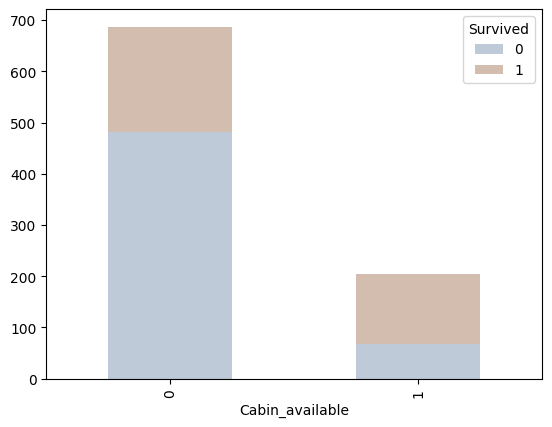

In [ ]:
ttc_df.pivot_table(
  'PassengerId', 'Cabin_available', 'Survived', 'count').plot(
  kind='bar', stacked=True, color=('#becad7','#d3bdae'))

In [ ]:
# Как мы видим из графика, существует явная зависимость между
# выживаемостью и наличием отдельной каюты.
# Те, у кого была отдельная каюта имели гораздо больше шансов выжить.
# Теперь колонку 'Cabin' можно удалить.

ttc_df.drop(['Cabin'], axis = 1, inplace = True)
ttc_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Cabin_available
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rev,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,S,Miss,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,1


In [ ]:
ttc_df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Embarked           0
Title              0
Cabin_available    0
dtype: int64

In [ ]:
# Мы заполнили все недостающие данные, теперь можно перейти к более глубокому анализу.
# Оценим влияние каждой колонки на показатель выживаемости. (п.8)

# Мы уже оценили взаимосвязь наличия каюты на выживаемость. (Cabin_avialable / Survived)
# Посмотрим, есть ли корреляция между классом и количеством выживших (Pclass / Survived)

ttc_df.groupby(['Pclass']) ['Survived'].value_counts(normalize=True)


Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

<Axes: xlabel='Pclass'>

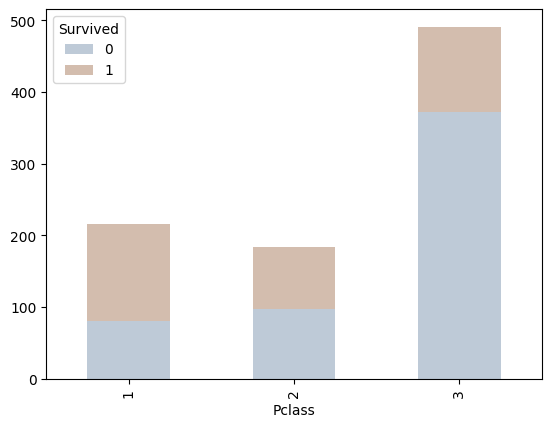

In [ ]:
# Как мы видим из данных, более 75% погибло в третьем классе,
# и более 62% выжило в первом.
# Во втором классе примерно поровну погибших и выживших.
# Следовательно, у путешественников с первым классом шансов выжить было больше.
# Отобразим эти данные на графике.

ttc_df.pivot_table(
  'PassengerId', 'Pclass', 'Survived', 'count').plot(
  kind='bar', stacked=True, color=('#becad7','#d3bdae'))

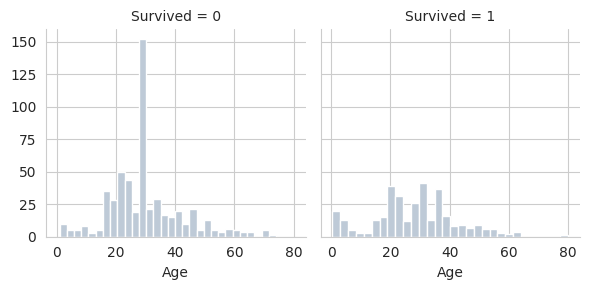

In [ ]:
# Колонка с именем хоть и помогла нам установить возраст,
# но врядли есть взаимосвязь с выживаемостью
# А вот с возрастом пассажиров можно поработать. (Age / Survived)
sns.set_style('whitegrid')

g = sns.FacetGrid(ttc_df, col='Survived')
g.map(plt.hist, 'Age', bins=30, color='#becad7')

<Axes: xlabel='Sex'>

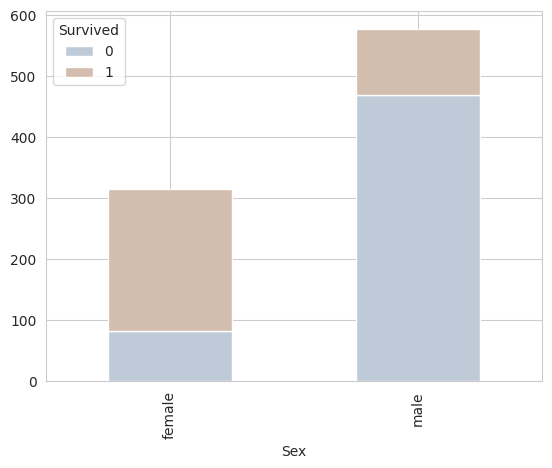

In [ ]:
# По графикам видно, что маленьких детей старались спасти в первую очередь.
# Можно отметить высокую смертность среди молодых пассажиров.

# Взглянем, на соотношение пола к выживаемости (Sex / Survived)

ttc_df.pivot_table(
  'PassengerId', 'Sex', 'Survived', 'count').plot(
  kind='bar', stacked=True, color=('#becad7','#d3bdae'))

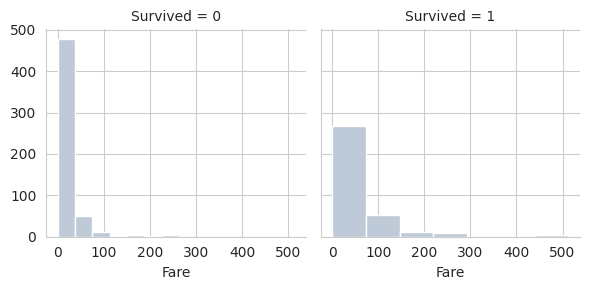

In [ ]:
# Картина для сильного пола неутешительная. Большинство мужчин в круизе погибло.
# А вот женщины - наоборот. Большинству из них удалось спастись.

# Колонка "SibSp" и "Parch" рассмотрена в примере ДЗ.
# Номер билета не несет предсказательной силы.
# Перейдем к рассмотрению стоимости билета на показатель выживаемости (Fare / Survived)
g = sns.FacetGrid(ttc_df, col='Survived')
g.map(plt.hist, 'Fare', bins=7, color='#becad7')

<Axes: xlabel='Embarked'>

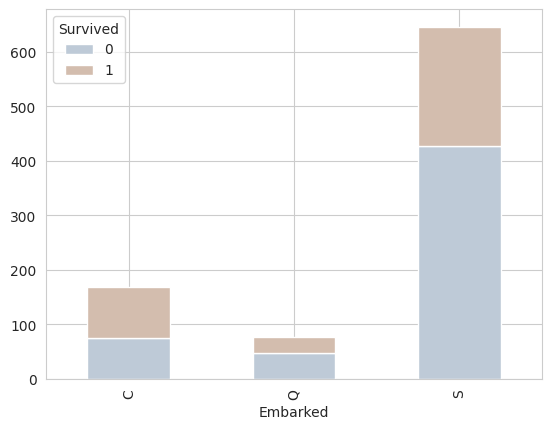

In [ ]:
# Из графика очевидно, что те, кто заплатил более сотни долларов за размещение
# (что соответствует каюте первого класса), имели гораздо больше шансов выжить.
# Это подтверждает и график Pclass / Survived .

# врядли порт погрузки можно связать с выживаемостью, но мы всё таки попробуем
# взглянуть на график Embarked / Survived

ttc_df.pivot_table(
  'PassengerId', 'Embarked', 'Survived', 'count').plot(
  kind='bar', stacked=True, color=('#becad7','#d3bdae'))


In [ ]:
# Как и ожидалось, логическую закономерность отследить по этому показателю сложно.
# На этом можно считать анализ завершенным.
# Выгрузим наш датафрейм в отдельный файл

ttc_df.to_csv('ttc_df.csv')